In [369]:
import networkx as nx
from pathlib import Path
import os
import json
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import random

In [ ]:
os.listdir()

In [739]:
all_tropes = json.load(open('all-tropes-with-links.json'))

# Let's get graphin'

In [236]:
c5 = nx.complete_graph(5)

In [239]:
# complete 
c5.edges()

EdgeView([(0, 1), (0, 2), (0, 3), (0, 4), (1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)])

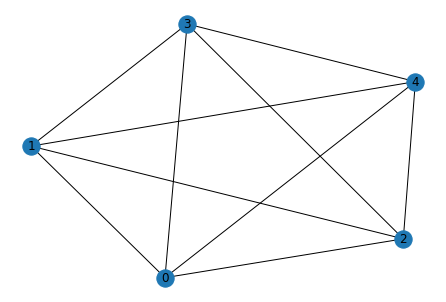

In [240]:
nx.draw(c5, with_labels = True)

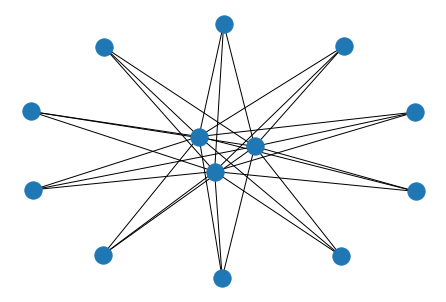

In [248]:
# complete (fully-connected) bipartite graph
nx.draw(nx.complete_bipartite_graph(3, 10))

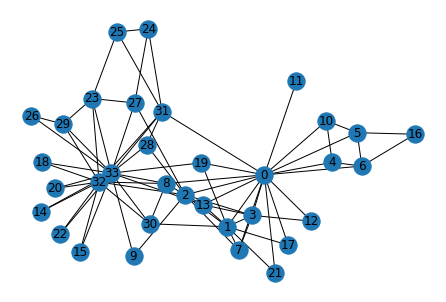

In [250]:
nx.draw(nx.karate_club_graph(), with_labels = True)

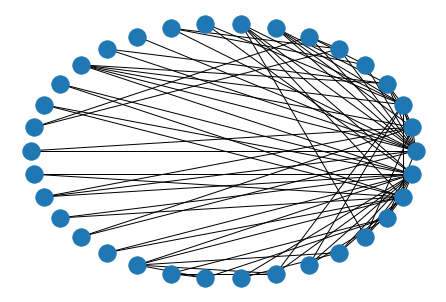

In [251]:
nx.draw_circular(nx.karate_club_graph())

# using trope data

In [740]:
def add_random_trope_graph(graph, d, n):
    for trope in list(np.random.choice(list(d.keys()), n)):
        graph.add_node(trope)
        graph.add_edges_from(([(trope, link) for link in d[trope]]))

In [797]:
e = nx.MultiDiGraph()
add_random_trope_graph(e, all_tropes, 3)

In [798]:
for node, edge in e.adjacency():
    print(node, edge)

FormatSpecificJoke {'BornInTheTheatre': {0: {}, 1: {}}, 'LiveActionTV': {0: {}}, 'Music': {0: {}}, 'Radio': {0: {}}, 'VideoGames': {0: {}}, 'WebOriginal': {0: {}}, 'WesternAnimation': {0: {}}, 'TheStinger': {0: {}}, 'NoFourthWall': {0: {}}, 'ShoutOut': {0: {}}, 'PaddleBallShot': {0: {}, 1: {}}, 'ThereAreTwoKindsOfPeopleInTheWorld': {0: {}}, 'LemonyNarrator': {0: {}}, 'FootnoteFever': {0: {}}, 'TwistedEchoCut': {0: {}, 1: {}}, 'DontExplainTheJoke': {0: {}, 1: {}}, 'AprilFoolsDay': {0: {}}, 'TechnologyMarchesOn': {0: {}}, 'Beat': {0: {}}, 'BuffySpeak': {0: {}}, 'RuleOfFunny': {0: {}, 1: {}}, 'FakeOutFadeOut': {0: {}, 1: {}}, 'ShamelessSelfPromoter': {0: {}, 1: {}}, 'DVDCommentary': {0: {}}, 'IsThereADoctorInTheHouse': {0: {}}, 'Expy': {0: {}}}
BornInTheTheatre {}
LiveActionTV {}
Music {}
Radio {}
VideoGames {}
WebOriginal {}
WesternAnimation {}
TheStinger {}
NoFourthWall {}
ShoutOut {}
PaddleBallShot {}
ThereAreTwoKindsOfPeopleInTheWorld {}
LemonyNarrator {}
FootnoteFever {}
TwistedEchoC

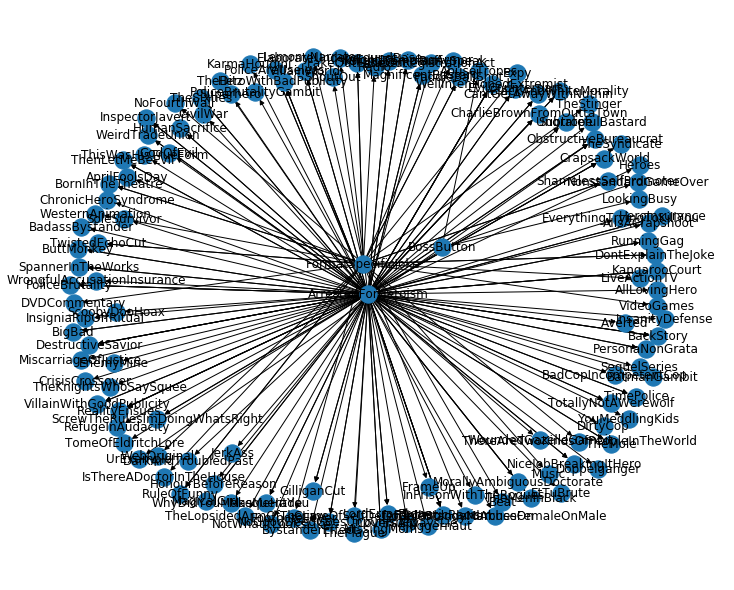

In [799]:
plt.figure(figsize=(10,8))
nx.draw(e, with_labels=True)

In [800]:
class graph:
    """
    Helper class that holds a random Multi-Directional Graph 
    created from a dict of tv tropes and has various helper methods.
    (You can still access NetworkX methods by calling self.graph.method_name.)
    
    Some specific methods don't work depending on the graph. In this case use self.graph.method_name 
    for specific ones 
    """
    def __init__(self, trope_list):
        self.graph = nx.MultiDiGraph()
        self.trope_list = trope_list
    
    def add_random_trope_graph(self, n):
        for trope in list(np.random.choice(list(self.trope_list.keys()), n)):
            self.graph.add_node(trope)
            self.graph.add_edges_from(([(trope, link) for link in self.trope_list[trope]]))
    
    # create simple plot
    def draw(self, labs = True):
        plt.figure(figsize=(8,8))
        nx.draw(self.graph, with_labels = labs)
        
    def degree_centrality(self, highest=True):
        return sorted(nx.degree_centrality(self.graph).items(), key = lambda x: x[1], reverse = highest)
        
    def closeness_centrality(self, highest=True):
        return sorted(nx.closeness_centrality(self.graph).items(), key = lambda x: x[1], reverse = highest)
    
    def between_centrality(self, highest=True):
        return sorted(nx.betweenness_centrality(self.graph).items(), key = lambda x: x[1], reverse = highest)
    
    def scaled_eigen_centrality(self, highest=True):
        eig_centrality = nx.eigenvector_centrality_numpy(self.graph)
        max_eig = max(eig_centrality.items(), key = lambda x: x[1])
        ec_scaled = {}
        for k in eig_centrality.keys():
            ec_scaled[k] = eig_centrality[k] / max_eig[1]
        return sorted(ec_scaled.items(), key = lambda x: x[1], reverse = highest)
    
    def closeness_hops(self, key):
        return 1/nx.closeness_centrality(self.graph)[key]
    
    def pred_jc(self, highest = True):
        preds = nx.jaccard_coefficient(self.graph)
        pred_dict = {}
        for n1, n2, pred in preds:
            pred_dict[(n1,n2)] = pred
        return sorted(pred_dict.items(), key = lambda x: x[1], reverse = highest)
    
    def pred_pref(self, highest = True):
        preds = nx.preferential_attachment(self.graph)
        pred_dict = {}
        for n1, n2, pred in preds:
            pred_dict[(n1,n2)] = pred
        return sorted(pred_dict.items(), key = lambda x: x[1], reverse = highest)
            

In [804]:
e = graph(all_tropes)

In [805]:
e.add_random_trope_graph(3)

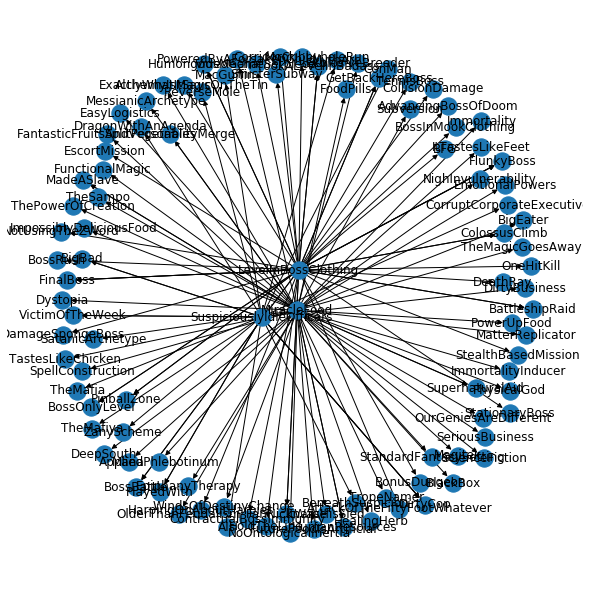

In [806]:
e.draw(labs = True)

In [807]:
print(nx.info(e.graph))

Name: 
Type: MultiDiGraph
Number of nodes: 100
Number of edges: 118
Average in degree:   1.1800
Average out degree:   1.1800


In [808]:
# degree centrality - % of total network that a node is connected to
e.degree_centrality(highest=True)[0:10]

[('MiracleFood', 0.5050505050505051),
 ('LevelInBossClothing', 0.4747474747474748),
 ('SuspiciouslyIdleOfficers', 0.21212121212121213),
 ('DirtyCop', 0.030303030303030304),
 ('FlunkyBoss', 0.030303030303030304),
 ('FinalBoss', 0.030303030303030304),
 ('SupernaturalAid', 0.020202020202020204),
 ('HumanResources', 0.020202020202020204),
 ('MadeASlave', 0.020202020202020204),
 ('BigBad', 0.020202020202020204)]

In [809]:
# Closeness centrality - avg distance - highest closeness = theorhetically reach everyone in network fastest

e.closeness_centrality(highest=True)[0:10]

[('SupernaturalAid', 0.010101010101010102),
 ('FunctionalMagic', 0.010101010101010102),
 ('AppliedPhlebotinum', 0.010101010101010102),
 ('DeepSouth', 0.010101010101010102),
 ('ImpossiblyDeliciousFood', 0.010101010101010102),
 ('TastesLikeChicken', 0.010101010101010102),
 ('ItTastesLikeFeet', 0.010101010101010102),
 ('OlderThanFeudalism', 0.010101010101010102),
 ('ImmortalityInducer', 0.010101010101010102),
 ('Immortality', 0.010101010101010102)]

In [810]:
# normalize to concrete avg # of 'hops' to get to a particular node in the network from any other node
e.closeness_hops('SubTrope')

KeyError: 'SubTrope'

In [811]:
# Betweenness centrality - "bridges" or "brokers" in a network - i.e. nodes that get 'passed through a lot' - news sources?
e.between_centrality(highest=True)[0:10]

NetworkXNotImplemented: not implemented for multigraph type

In [812]:
#Eigenvector centrality - high rollers are connected to other high rollers - eigen - self
e.scaled_eigen_centrality()[0:10]

[('FinalBoss', 1.0),
 ('FlunkyBoss', 0.9999999999993221),
 ('DirtyCop', 0.8004243127605274),
 ('BossBattle', 0.666666666802809),
 ('ColossusClimb', 0.6666666667601637),
 ('TookALevelInBadass', 0.6666666667354697),
 ('HumongousMecha', 0.6666666667113605),
 ('PinballZone', 0.6666666666496726),
 ('BattleshipRaid', 0.6666666666158128),
 ('GetBackHereBoss', 0.6666666666129287)]

In [813]:
# Link Prediction - dynamics! - doesn't work for directed graphs.

# intuition: nodes that are similar in some way but aren't connected will be connected in the future
# jaccard coefficient
# esssentially looks at common neighbors between pairs of nodes
# lol think gray's anatomy and pydata carolina example
# two people who have lots of exlovers in common probably share similar interests, therefore those two should date

e.pred_jc()[0:10]

NetworkXNotImplemented: not implemented for directed type

In [814]:
# preferential attachment alg - rich getting richer - 
# the nodes with more connections will get more connections in the future (degree of n1 * deg of n2)
e.pred_pref()[0:10]

NetworkXNotImplemented: not implemented for directed type

In [815]:
# Community detection algos might be super useful

# More Interactive version using plotly

In [816]:
pos = nx.spring_layout(e.graph)

In [817]:
edge_trace = []
for edge in e.graph.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]

    trace = go.Scatter(x = [x0, x1, None], y = [y0, y1, None])  
        
#         trace  = make_edge([x0, x1, None], [y0, y1, None], text,
#                            0.3*midsummer.edges()[edge]['weight']**1.75)

    edge_trace.append(trace)

In [820]:
node_trace = go.Scatter(x = [], 
                        y = [], 
                        text = [], 
                        textposition = "top center", 
                        textfont_size = 10,
                        mode      = 'markers',
                        hoverinfo = 'text',
                        marker    = dict(color = [],
                                         line  = None))
# For each node in e, get the position and size and add to the node_trace
for node in e.graph.nodes():
    x, y = pos[node]
    node_trace['x'] += tuple([x])
    node_trace['y'] += tuple([y])
    node_trace['marker']['color'] += tuple(['cornflowerblue'])
    node_trace['text'] += tuple(['<b>' + node + '</b>'])

In [819]:
node_trace

Scatter({
    'hoverinfo': 'text',
    'marker': {'color': [cornflowerblue, cornflowerblue, cornflowerblue,
                         cornflowerblue, cornflowerblue, cornflowerblue,
                         cornflowerblue, cornflowerblue, cornflowerblue,
                         cornflowerblue, cornflowerblue, cornflowerblue,
                         cornflowerblue, cornflowerblue, cornflowerblue,
                         cornflowerblue, cornflowerblue, cornflowerblue,
                         cornflowerblue, cornflowerblue, cornflowerblue,
                         cornflowerblue, cornflowerblue, cornflowerblue,
                         cornflowerblue, cornflowerblue, cornflowerblue,
                         cornflowerblue, cornflowerblue, cornflowerblue,
                         cornflowerblue, cornflowerblue, cornflowerblue,
                         cornflowerblue, cornflowerblue, cornflowerblue,
                         cornflowerblue, cornflowerblue, cornflowerblue,
                

In [821]:
layout = go.Layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)'
)


fig = go.Figure(layout = layout)

for trace in edge_trace:
    fig.add_trace(trace)

fig.add_trace(node_trace)

fig.update_layout(showlegend = False)

fig.update_xaxes(showticklabels = False)

fig.update_yaxes(showticklabels = False)

fig.show()